In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Parameter
price_path = "../data/clean_data/china_stock_price_20200906.csv"

In [3]:
df_price = pd.read_csv(price_path)
df_price["trade_date"] = pd.to_datetime(df_price["trade_date"])
df_price["trade_date"] = df_price["trade_date"].dt.to_period("M").astype(str)
df_price["trade_date"] = pd.to_datetime(df_price["trade_date"])
df_price = df_price.groupby(["name", "industry", "trade_date"])["close"].mean().reset_index()
df_price = df_price[~((df_price["name"].str.startswith("ST")) | (df_price["name"].str.startswith("*ST")))]

In [98]:
df_stock_all = pd.DataFrame()
for stock in tqdm(df_price["name"].unique()):
    df_stock = df_price[df_price["name"] == stock].copy()
    df_stock["return"] = df_stock["close"].pct_change()
    df_stock = df_stock.dropna()
    df_stock = df_stock.drop("close", axis=1)
    df_stock_all = df_stock_all.append(df_stock)

100%|██████████| 3769/3769 [01:50<00:00, 34.16it/s]


In [99]:
df_stock_all

,name,industry,trade_date,return
24157,GQY视讯,IT设备,2010-05-01,-0.197436
24158,GQY视讯,IT设备,2010-06-01,-0.005723
24159,GQY视讯,IT设备,2010-07-01,0.188606
24160,GQY视讯,IT设备,2010-08-01,0.105158
24161,GQY视讯,IT设备,2010-09-01,-0.413918
...,...,...,...,...
504051,龙马环卫,环境保护,2020-05-01,0.242292
504052,龙马环卫,环境保护,2020-06-01,0.150276
504053,龙马环卫,环境保护,2020-07-01,0.075794
504054,龙马环卫,环境保护,2020-08-01,0.101987


In [79]:
df_p = df_price.pivot_table(values="close", index=["trade_date"], columns=["industry", "name"]).reset_index()
df_p = df_p.sort_values("trade_date")
# df_p = df_p.set_index("trade_date")

In [82]:
df_p.head(1)

industry trade_date  IT设备                                          ...   黄金  \
name                GQY视讯 东方网力 中国长城 中科曙光 传艺科技 佳禾智能 华力创通 协创数据 古鳌科技  ... 中润资源   
0        1994-06-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   

industry                                               
name     中金黄金 园城黄金 山东黄金 恒邦股份 湖南黄金 紫金矿业 西部黄金 赤峰黄金 银泰黄金  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1 rows x 3770 columns]

In [85]:
df_r = df_p[[col for col in df_p.columns if "trade_date" not in col]].pct_change()
# df_r = df_r.mean(axis=0).reset_index(name="return")
# df_r = df_r.dropna()

industry      IT设备                                                    \
name         GQY视讯      东方网力      中国长城      中科曙光      传艺科技      佳禾智能   
0              NaN       NaN       NaN       NaN       NaN       NaN   
1              NaN       NaN       NaN       NaN       NaN       NaN   
2              NaN       NaN       NaN       NaN       NaN       NaN   
3              NaN       NaN       NaN       NaN       NaN       NaN   
4              NaN       NaN       NaN       NaN       NaN       NaN   
..             ...       ...       ...       ...       ...       ...   
311      -0.005786 -0.060903  0.134539 -0.127491  0.027190  0.228306   
312       0.007681  0.201578 -0.022443 -0.035828  0.059192 -0.151229   
313       0.059397  0.007184  0.218323  0.163965  0.220996 -0.182816   
314       0.062810  0.041712  0.178077  0.004632  0.215954 -0.020999   
315       0.170370  0.334406 -0.085635 -0.033116 -0.083872 -0.021080   

industry                                          ...        黄金            \
name          华力创通      协创数据      古鳌科技      同方股份  ...      中润资源      中金黄金   
0              NaN       NaN       NaN       NaN  ...       NaN       NaN   
1              NaN       NaN       NaN       NaN  ...       NaN       NaN   
2              NaN       NaN       NaN       NaN  ...       NaN       NaN   
3              NaN       NaN       NaN       NaN  ...       NaN       NaN   
4              NaN       NaN       NaN       NaN  ...       NaN       NaN   
..             ...       ...       ...       ...  ...       ...       ...   
311       0.049967       NaN  0.124475 -0.097123  ... -0.104125  0.036128   
312       0.047612       NaN -0.479483  0.028204  ... -0.005498  0.010716   
313       0.149933       NaN  0.427928  0.078054  ...  0.166105  0.172108   
314       0.050175  1.265721  0.249868  0.001173  ...  0.111457  0.048426   
315      -0.028374  0.053253  0.162791  0.000956  ... -0.027930  0.013648   

industry                                                              \
name          园城黄金      山东黄金      恒邦股份      湖南黄金      紫金矿业      西部黄金   
0              NaN       NaN       NaN       NaN       NaN       NaN   
1              NaN       NaN       NaN       NaN       NaN       NaN   
2              NaN       NaN       NaN       NaN       NaN       NaN   
3              NaN       NaN       NaN       NaN       NaN       NaN   
4              NaN       NaN       NaN       NaN       NaN       NaN   
..             ...       ...       ...       ...       ...       ...   
311      -0.053430  0.016523 -0.006366 -0.041868 -0.019557 -0.026411   
312       0.004950 -0.018181 -0.047009 -0.006020  0.034568 -0.004308   
313       0.096775  0.093100  0.255292  0.127897  0.362504  0.090526   
314      -0.000720 -0.078138 -0.010969  0.062457  0.135026  0.041910   
315      -0.029299 -0.208259 -0.063050  0.020714  0.134029 -0.015049   

industry                      
name          赤峰黄金      银泰黄金  
0              NaN       NaN  
1              NaN       NaN  
2              NaN       NaN  
3              NaN       NaN  
4              NaN       NaN  
..             ...       ...  
311       0.058710 -0.007187  
312       0.087911 -0.044034  
313       0.407164  0.126878  
314       0.477326 -0.020111  
315       0.001486 -0.023766  

[316 rows x 3769 columns]

In [78]:
df_r.stack()
# df.set_index([“index", “time”])[[“col_1”, “col_2"]].stack().reset_index().drop(0, axis=1).rename(columns={...})

industry         IT设备  专用机械  中成药  乳制品  互联网  仓储物流  供气供热  保险  元器件  全国地产  ...  \
trade_date name                                                        ...   
1994-07-01 西部创业   NaN   NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN   NaN  ...   
1994-08-01 西部创业   NaN   NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN   NaN  ...   
1994-09-01 深大通    NaN   NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN   NaN  ...   
           西部创业   NaN   NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN   NaN  ...   
1994-10-01 深大通    NaN   NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN   NaN  ...   
...               ...   ...  ...  ...  ...   ...   ...  ..  ...   ...  ...   
2020-09-01 龙蟒佰利   NaN   NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN   NaN  ...   
           龙蟠科技   NaN   NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN   NaN  ...   
           龙软科技   NaN   NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN   NaN  ...   
           龙韵股份   NaN   NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN   NaN  ...   
           龙马环卫   NaN   NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN   NaN  ...   

industry         钢加工        铁路  铅锌   铜   铝  银行  陶瓷  食品  饲料  黄金  
trade_date name                                                 
1994-07-01 西部创业  NaN -0.259719 NaN NaN NaN NaN NaN NaN NaN NaN  
1994-08-01 西部创业  NaN  0.452128 NaN NaN NaN NaN NaN NaN NaN NaN  
1994-09-01 深大通   NaN       NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           西部创业  NaN  0.368264 NaN NaN NaN NaN NaN NaN NaN NaN  
1994-10-01 深大通   NaN       NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...              ...       ...  ..  ..  ..  ..  ..  ..  ..  ..  
2020-09-01 龙蟒佰利  NaN       NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           龙蟠科技  NaN       NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           龙软科技  NaN       NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           龙韵股份  NaN       NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           龙马环卫  NaN       NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[473893 rows x 110 columns]

In [75]:
df_r.head()

industry    IT设备                                               ...   黄金       \
name       GQY视讯 东方网力 中国长城 中科曙光 传艺科技 佳禾智能 华力创通 协创数据 古鳌科技 同方股份  ... 中润资源 中金黄金   
trade_date                                                     ...             
1994-06-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1994-07-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1994-08-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1994-09-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1994-10-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

industry                                            
name       园城黄金 山东黄金 恒邦股份 湖南黄金 紫金矿业 西部黄金 赤峰黄金 银泰黄金  
trade_date                                          
1994-06-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1994-07-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1994-08-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1994-09-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1994-10-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 3769 columns]

In [42]:
df_ind_all = pd.DataFrame()
for industry in df_r["industry"].unique():
    df_ind = df_r[df_r["industry"] == industry]
    q_25 = df_ind["return"].quantile(0.25)
    q_75 = df_ind["return"].quantile(0.75)
    df_ind_all = df_ind_all.append(df_ind[(df_ind["return"] >= q_25) & (df_ind["return"] <= q_75)])
df_r = df_ind_all

In [46]:
df_r.head(1)

,industry,name,return
2,IT设备,中国长城,0.007599


IT设备


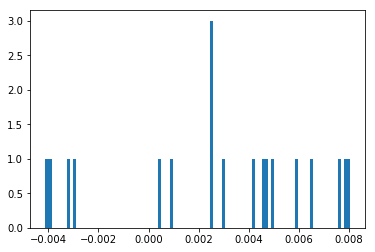

专用机械


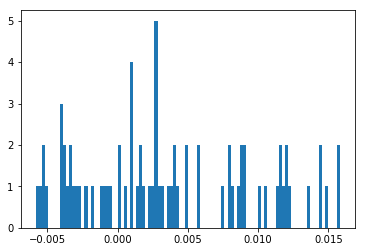

中成药


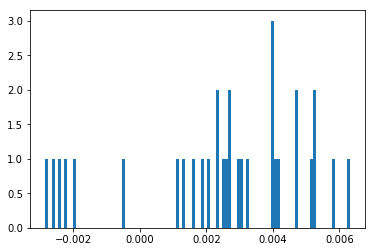

乳制品


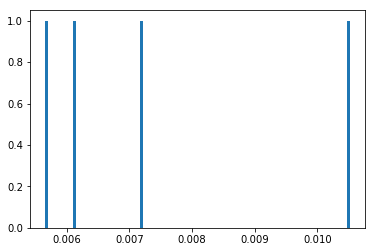

互联网


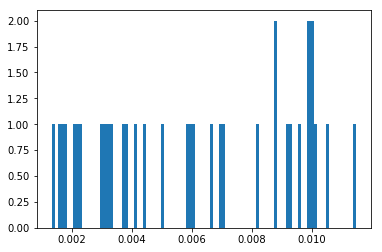

仓储物流


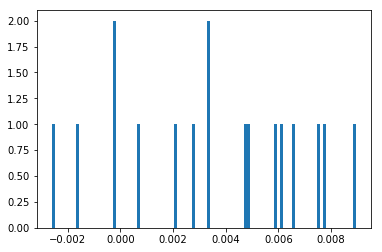

供气供热


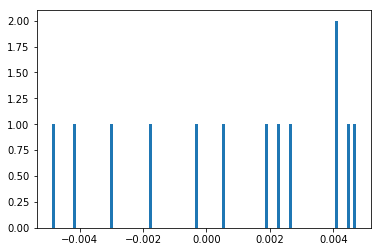

保险


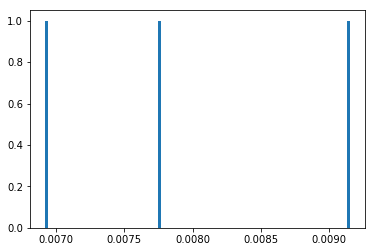

元器件


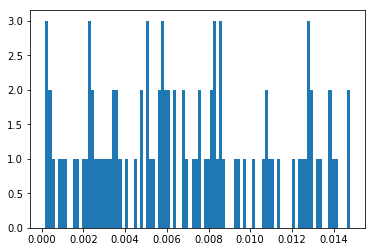

全国地产


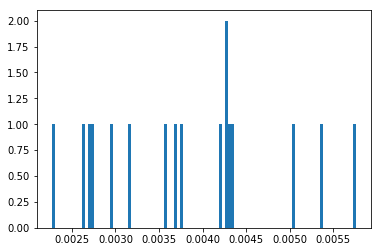

公共交通


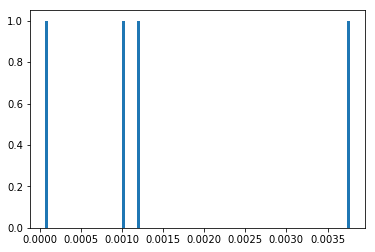

公路


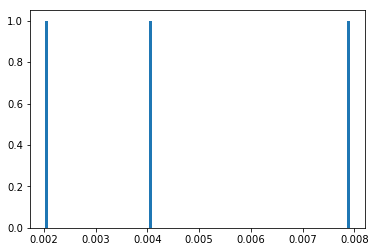

其他商业


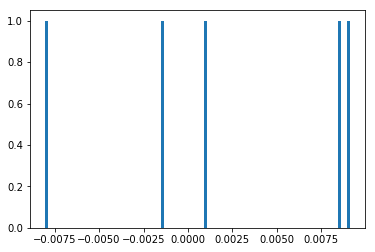

其他建材


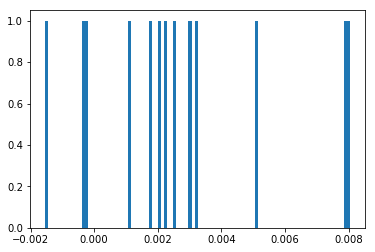

农业综合


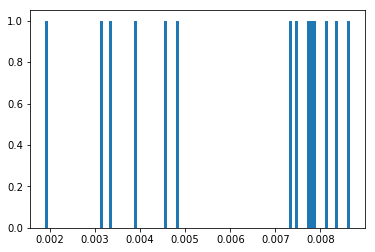

农用机械


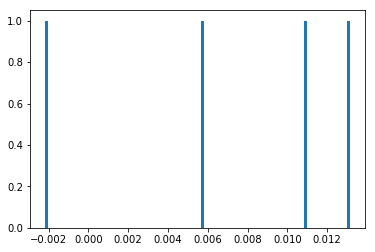

农药化肥


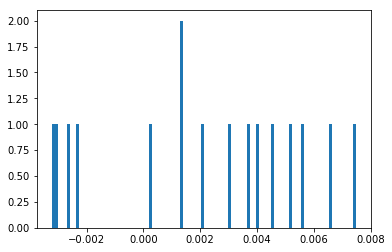

出版业


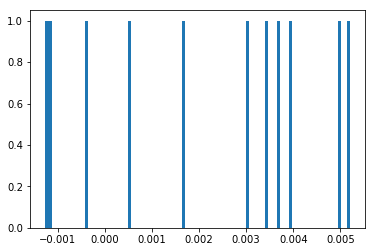

化学制药


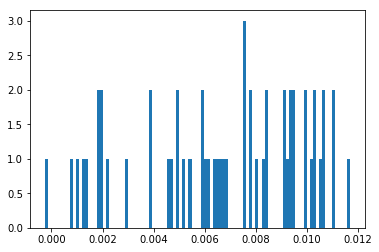

化工原料


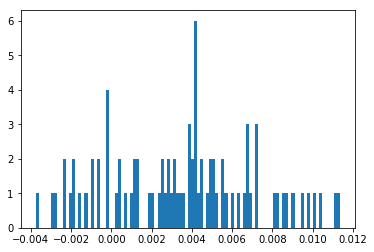

化工机械


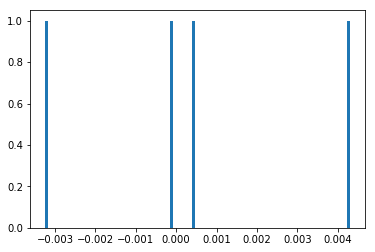

化纤


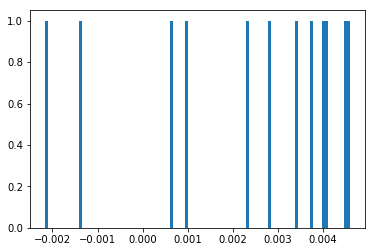

区域地产


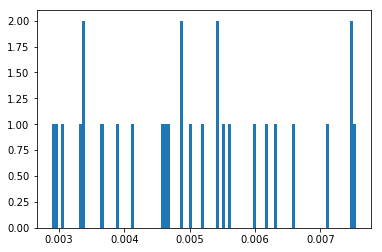

医疗保健


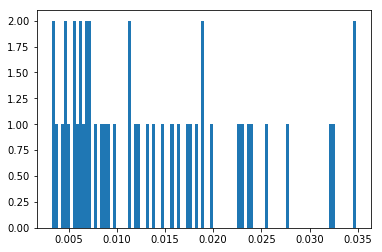

医药商业


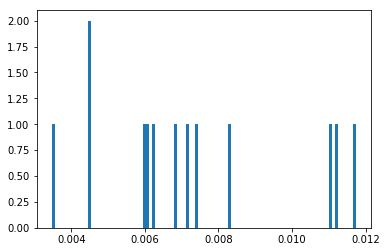

半导体


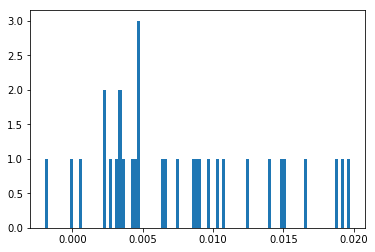

商品城


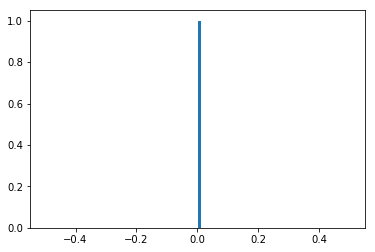

商贸代理


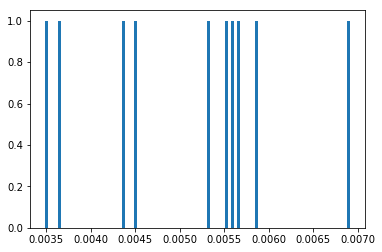

啤酒


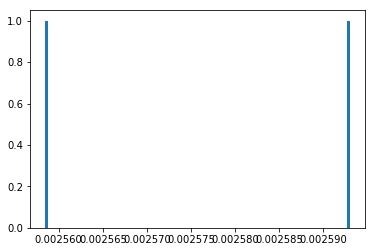

园区开发


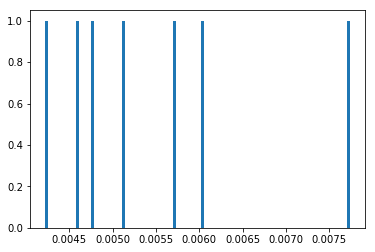

塑料


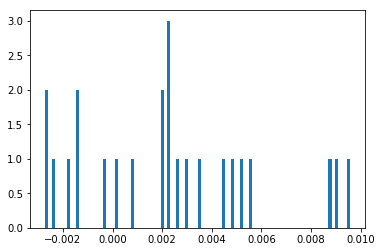

多元金融


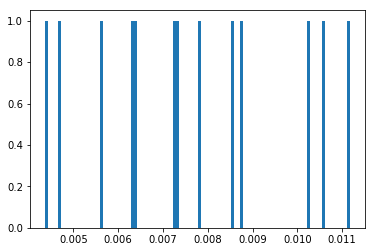

家居用品


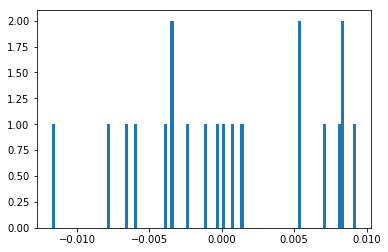

家用电器


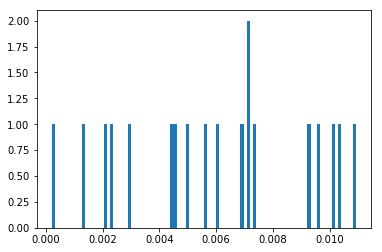

小金属


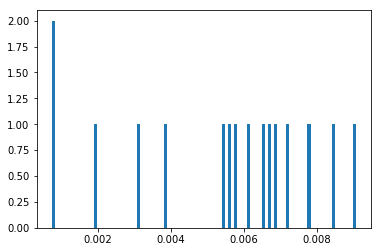

工程机械


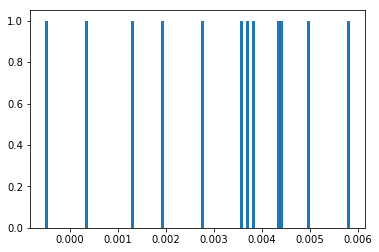

广告包装


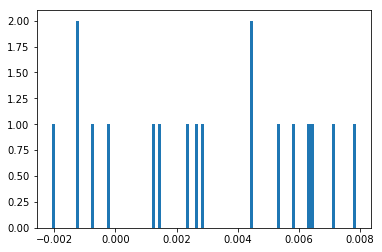

建筑工程


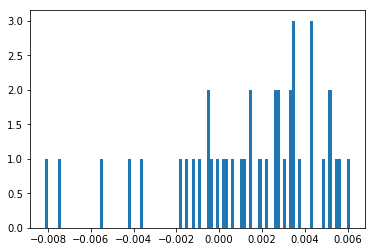

影视音像


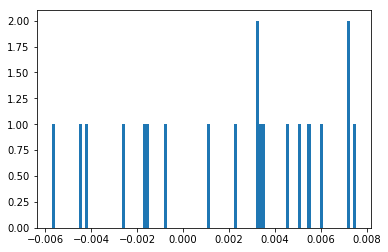

房产服务


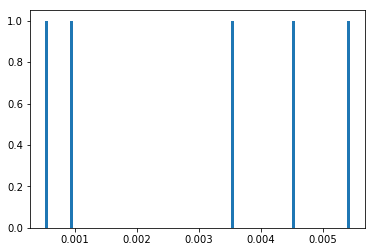

批发业


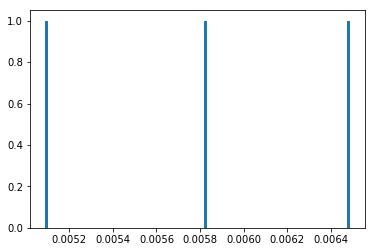

摩托车


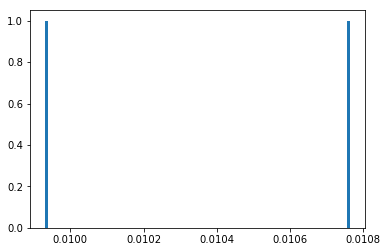

文教休闲


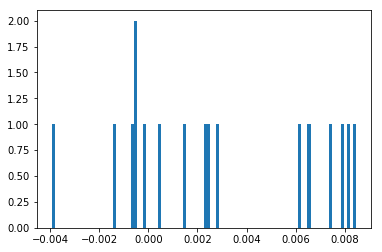

新型电力


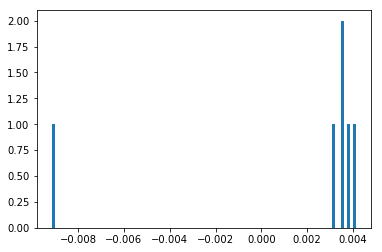

旅游景点


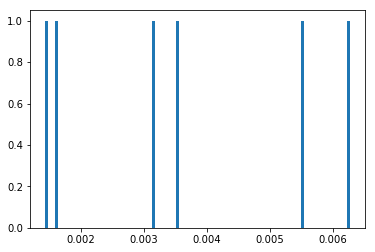

旅游服务


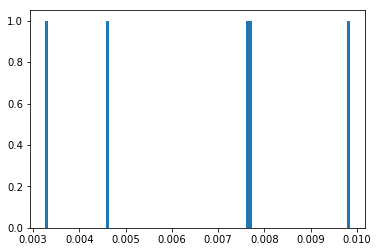

日用化工


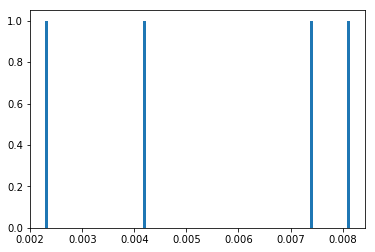

普钢


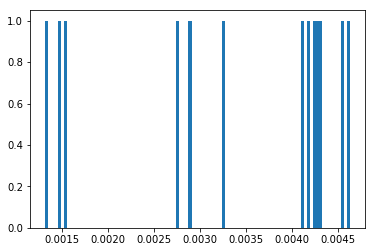

服饰


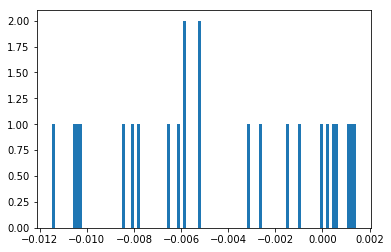

机场


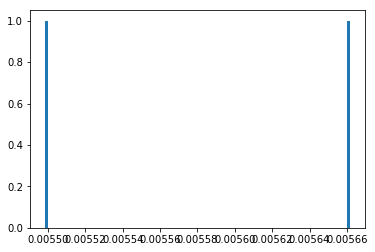

机床制造


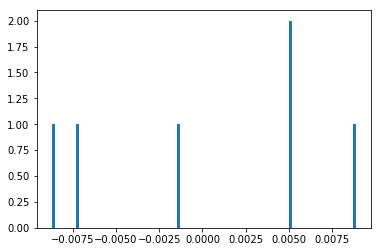

机械基件


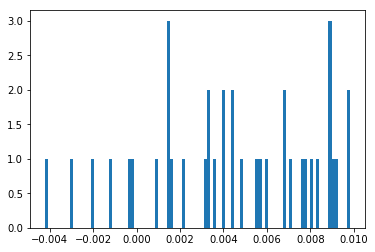

染料涂料


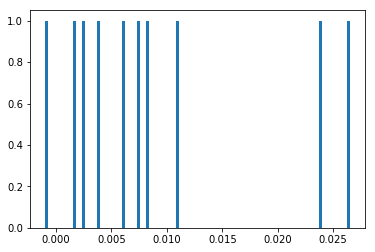

橡胶


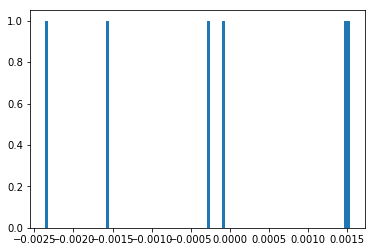

水力发电


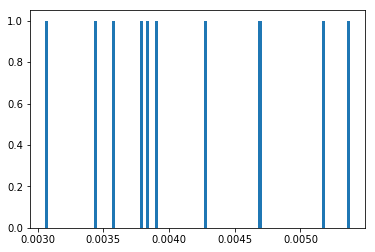

水务


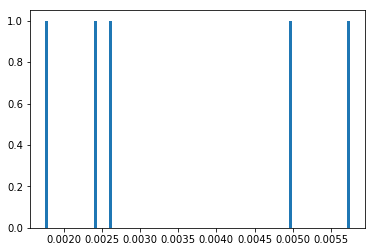

水泥


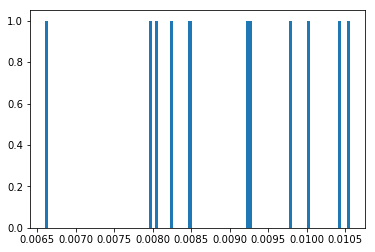

水运


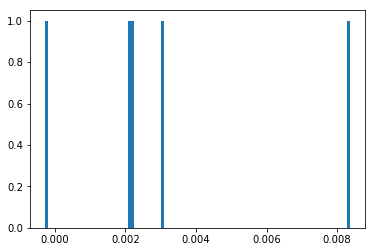

汽车整车


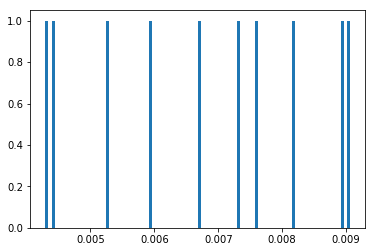

汽车服务


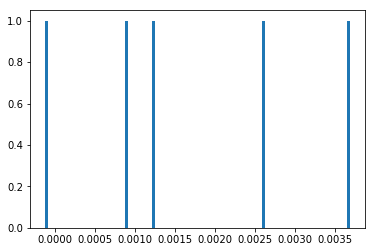

汽车配件


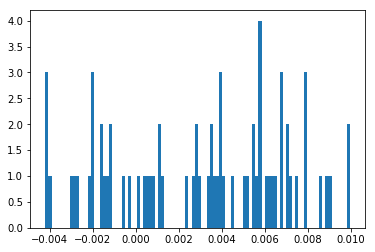

渔业


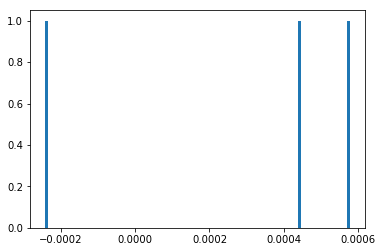

港口


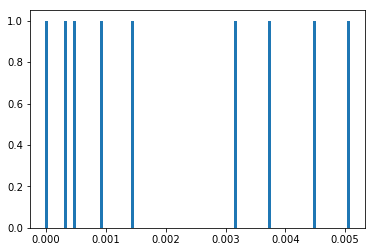

火力发电


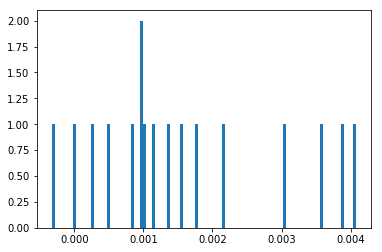

焦炭加工


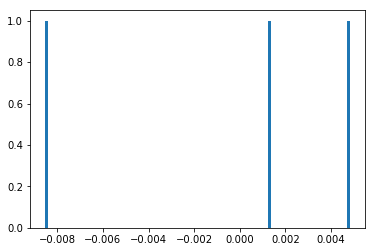

煤炭开采


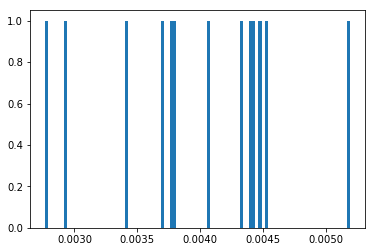

特种钢


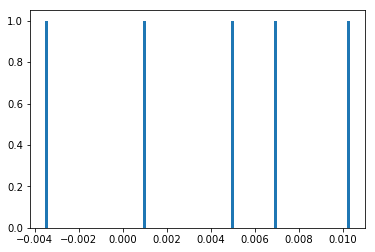

环境保护


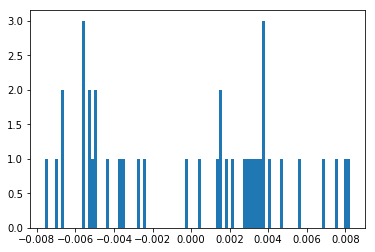

玻璃


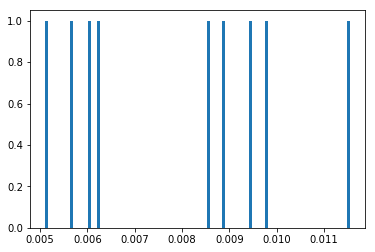

生物制药


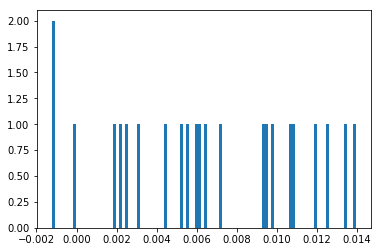

电信运营


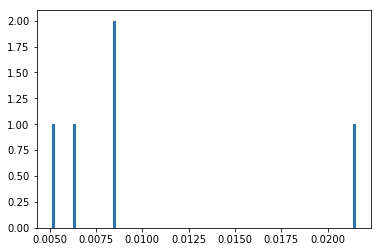

电器仪表


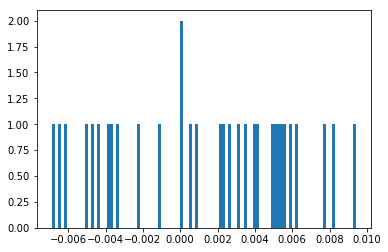

电气设备


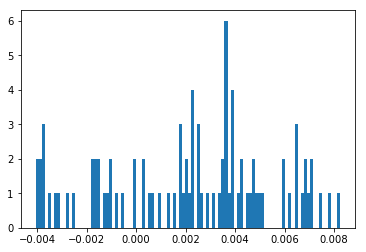

白酒


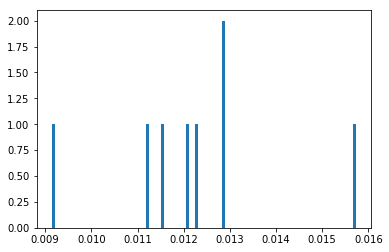

百货


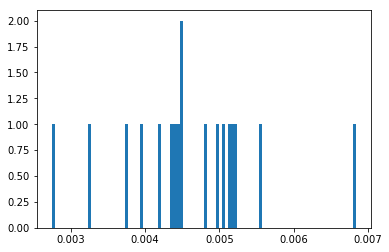

石油加工


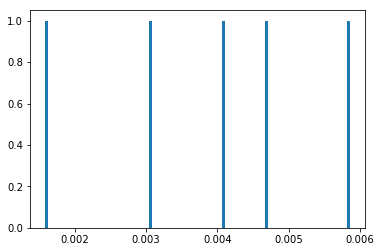

石油开采


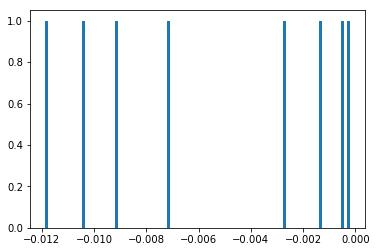

石油贸易


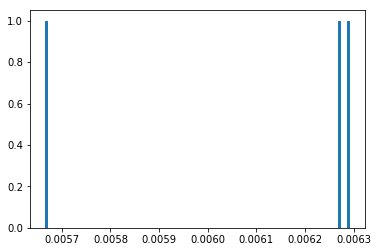

矿物制品


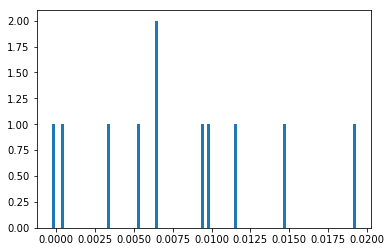

种植业


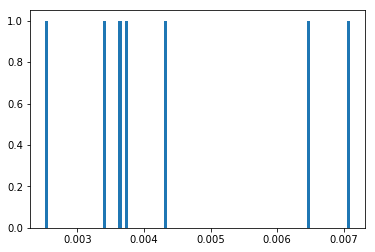

空运


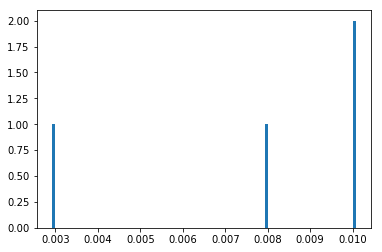

红黄酒


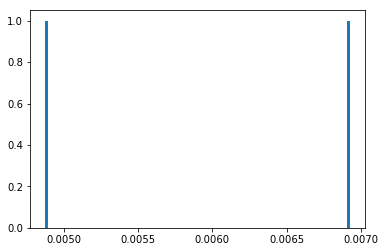

纺织


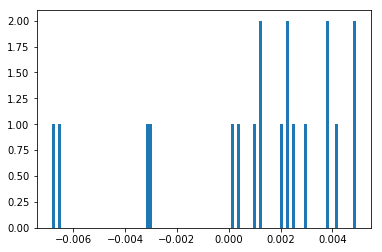

纺织机械


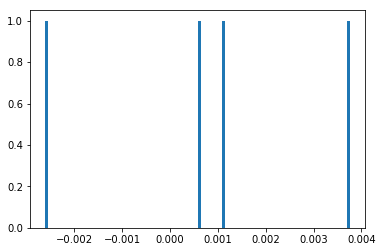

综合类


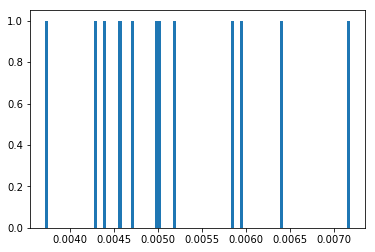

航空


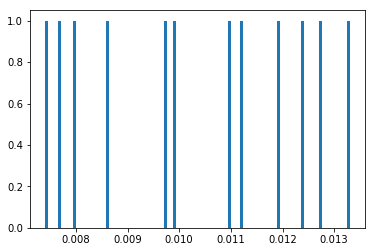

船舶


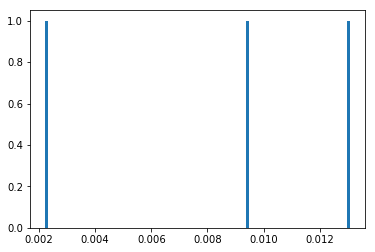

装修装饰


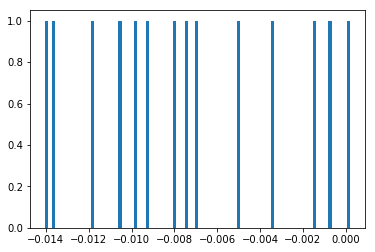

证券


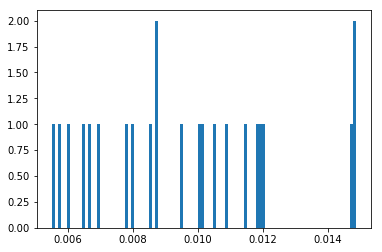

超市连锁


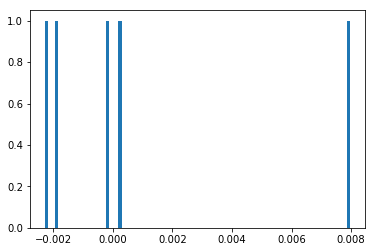

路桥


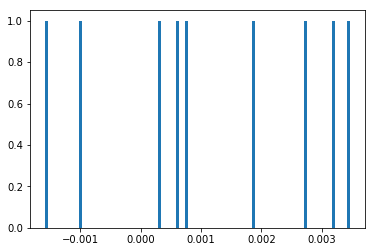

软件服务


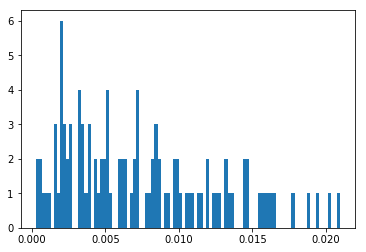

软饮料


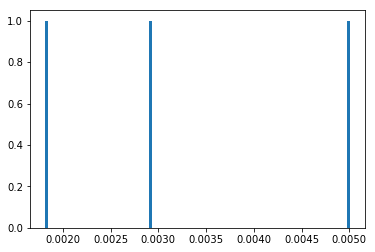

轻工机械


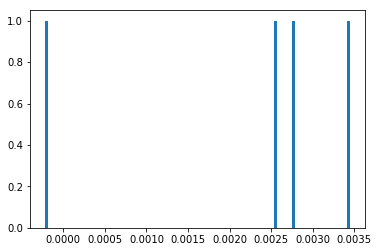

运输设备


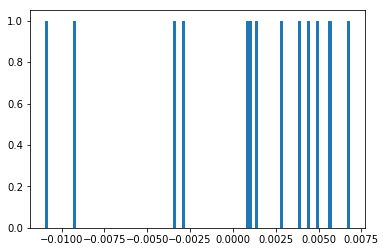

通信设备


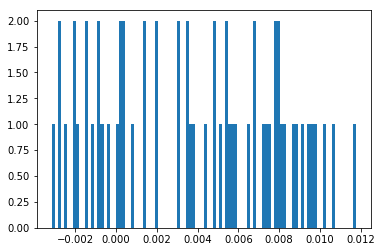

造纸


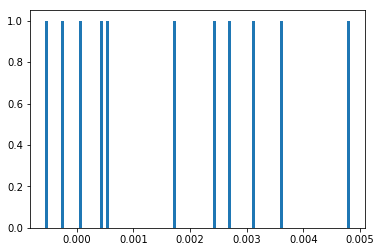

酒店餐饮


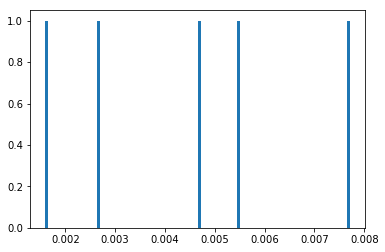

钢加工


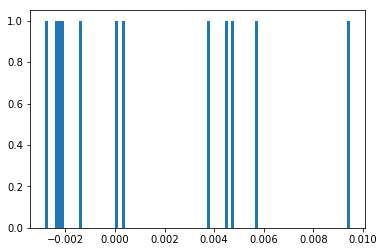

铁路


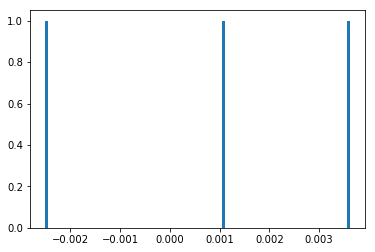

铅锌


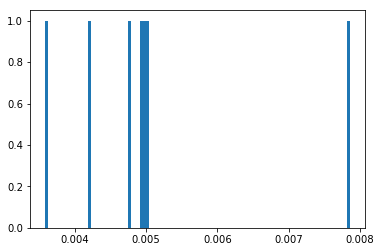

铜


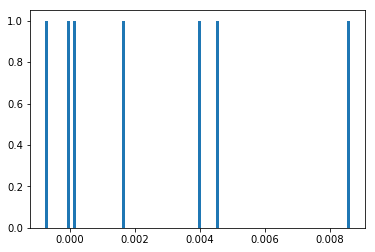

铝


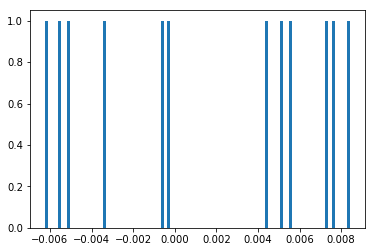

银行


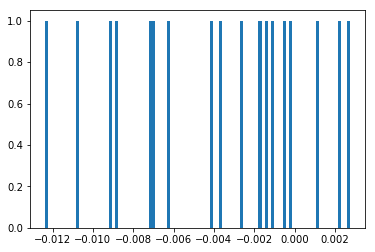

陶瓷


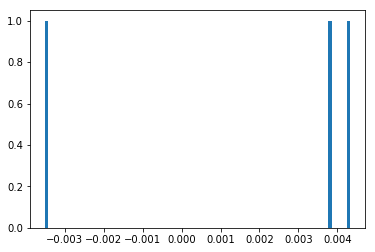

食品


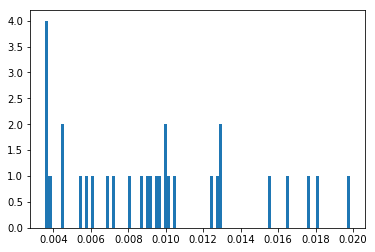

饲料


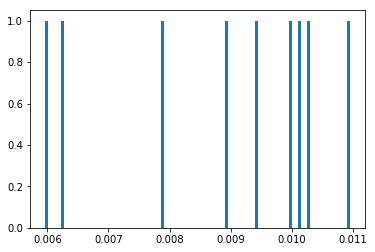

黄金


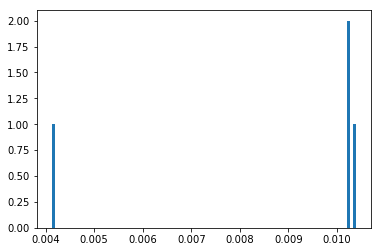

In [44]:
# Check the distribution of every industry
for i in df_ind_all["industry"].unique():
    print(i)
    plt.hist(
        df_ind_all[df_ind_all["industry"] == i]["return"].dropna(), bins=100
    )
    plt.show()

In [49]:
df_r = df_r.groupby("industry")["return"].mean().reset_index()

In [53]:
# df.pivot_table(values=“col_y", index=[“col_index"], columns=“cols").reset_index()
df_r.pivot_table(values="return", columns="industry").reset_index()

industry,index,IT设备,专用机械,中成药,乳制品,互联网,仓储物流,供气供热,保险,元器件,...,钢加工,铁路,铅锌,铜,铝,银行,陶瓷,食品,饲料,黄金
0,return,0.00272,0.003628,0.002414,0.007366,0.006013,0.003517,0.000818,0.007944,0.006831,...,0.001478,0.000726,0.005047,0.002577,0.001424,-0.003931,0.001542,0.009424,0.008868,0.008748


In [52]:
df_r

,industry,return
0,IT设备,0.002720
1,专用机械,0.003628
2,中成药,0.002414
3,乳制品,0.007366
4,互联网,0.006013
...,...,...
103,银行,-0.003931
104,陶瓷,0.001542
105,食品,0.009424
106,饲料,0.008868


In [19]:

df_p.columns = [i + "_" + j for i, j in df_p.columns]

In [20]:
df_p.head()

industry    IT设备                                               ...   黄金       \
name       GQY视讯 东方网力 中国长城 中科曙光 传艺科技 佳禾智能 华力创通 协创数据 古鳌科技 同方股份  ... 中润资源 中金黄金   
trade_date                                                     ...             
1994-06-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1994-07-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1994-08-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1994-09-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1994-10-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

industry                                            
name       园城黄金 山东黄金 恒邦股份 湖南黄金 紫金矿业 西部黄金 赤峰黄金 银泰黄金  
trade_date                                          
1994-06-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1994-07-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1994-08-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1994-09-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1994-10-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 3769 columns]

In [26]:
import numpy as np
df_tmp1 = pd.DataFrame()
df_tmp1["a"] = [1, np.nan, 2]
df_tmp1["a"].mean()

1.5